# Activity plots
Changes the activity characterization implemented in ```community.ipynb``` and analyses changes in user activities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = '/dlabdata1/turkish_wiki'

# Preprocessing edits for analysis

In [3]:
edits = pd.read_csv(f'{DATA_PATH}/processed_data/account_edits.csv', usecols=['event_user_id', 'event_timestamp', 'page_id','page_revision_count', 
               'revision_minor_edit', 'revision_text_bytes','revision_is_identity_revert'], index_col = 0)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
edits = edits.reset_index()
edits = edits[['event_user_id', 'event_timestamp', 'page_id','page_revision_count', 
               'revision_minor_edit', 'revision_text_bytes','revision_is_identity_revert']]
edits[['revision_minor_edit','revision_is_identity_revert']] = edits[['revision_minor_edit','revision_is_identity_revert']].convert_dtypes()
edits['event_timestamp'] = pd.to_datetime(edits['event_timestamp'],   utc = True)

In [5]:
block_dates = [pd.to_datetime('2017-04-29', utc = True), pd.to_datetime('2020-01-15 19:00', utc = True)]

# Characterize blocked users
## 1) Change binning
Instead of putting users in bins by predefined edit numbers, I look at different percentiles of daily edits of users in the preblock period. I bin them in 5 categories based on their daily edits percentile:
* Daily edits between 0 and 25 percentile
* Daily edits between 25 and 50 percentile
* Daily edits between 50 and 75 percentile
* Daily edits between 75 and 99 percentile
* Daily edits between 99 and 100 percentile

In [6]:
blocked_days = (block_dates[1] - block_dates[0]).days

In [7]:
preblock_edit_counts = edits[(edits['event_timestamp'] >= block_dates[0] - pd.Timedelta(days=blocked_days)) & (edits['event_timestamp'] < block_dates[0])].groupby('event_user_id').agg(
        {'event_timestamp': ['min', 'max'],'revision_minor_edit': 'size'}).reset_index()

In [8]:
block_edit_counts = edits[(edits['event_timestamp'] >= block_dates[0]) & (edits['event_timestamp'] < block_dates[1])].groupby('event_user_id').agg(
        {'event_timestamp': ['min', 'max'],'revision_minor_edit': 'size'}).reset_index()

In [9]:
preblock_edit_counts.columns = ['user_id','first_edit_before_block', 'last_edit_before_block', 'number_of_edits']
block_edit_counts.columns = ['user_id', 'first_edit_during_block', 'last_edit_during_block', 'number_of_edits']

In [10]:
preblock_edit_counts.sort_values('number_of_edits', ascending = False)

,user_id,first_edit_before_block,last_edit_before_block,number_of_edits
10332,573665,2014-08-12 21:22:49+00:00,2017-04-28 21:16:47+00:00,222814
1105,90501,2014-08-14 19:22:44+00:00,2017-04-28 22:04:57+00:00,216000
2800,221544,2014-08-12 13:00:53+00:00,2017-04-28 19:06:33+00:00,73737
1061,86010,2014-08-12 02:06:07+00:00,2017-04-28 21:23:09+00:00,47235
1471,123656,2014-08-12 08:53:00+00:00,2017-04-28 20:42:54+00:00,35633
...,...,...,...,...
46323,842788,2016-03-06 16:35:28+00:00,2016-03-06 16:35:28+00:00,1
46322,842779,2016-02-14 18:12:52+00:00,2016-02-14 18:12:52+00:00,1
46321,842773,2016-02-14 18:05:50+00:00,2016-02-14 18:05:50+00:00,1
21400,675719,2015-01-21 19:13:52+00:00,2015-01-21 19:13:52+00:00,1


## Editor activity levels

In [11]:
preblock_edit_counts['edits_per_day'] = preblock_edit_counts['number_of_edits']/(blocked_days)

In [12]:
preblock_edit_counts

,user_id,first_edit_before_block,last_edit_before_block,number_of_edits,edits_per_day
0,25,2014-11-17 07:39:39+00:00,2016-09-15 08:51:50+00:00,2,0.002018
1,39,2015-07-08 11:00:43+00:00,2017-03-16 10:51:19+00:00,14,0.014127
2,47,2016-07-01 08:19:57+00:00,2016-07-01 08:53:14+00:00,7,0.007064
3,89,2016-09-14 13:27:45+00:00,2016-09-14 13:27:45+00:00,1,0.001009
4,137,2014-12-03 09:29:04+00:00,2016-08-24 09:13:13+00:00,10,0.010091
...,...,...,...,...,...
68822,964220,2017-04-28 21:44:27+00:00,2017-04-28 21:44:27+00:00,1,0.001009
68823,964228,2017-04-28 22:33:28+00:00,2017-04-28 22:33:28+00:00,1,0.001009
68824,964229,2017-04-28 22:23:20+00:00,2017-04-28 22:23:20+00:00,1,0.001009
68825,964230,2017-04-28 22:46:12+00:00,2017-04-28 22:52:38+00:00,3,0.003027


In [13]:
# Filter users who only have 1 edit
preblock_edit_counts = preblock_edit_counts[preblock_edit_counts['number_of_edits'] > 1]

In [14]:
summary_stats = preblock_edit_counts.edits_per_day.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

In [15]:
summary_stats

count    39467.000000
mean         0.052612
std          1.737151
min          0.002018
25%          0.002018
50%          0.003027
75%          0.007064
99%          0.341070
max        224.837538
Name: edits_per_day, dtype: float64

In [16]:
bins = [0] +list(summary_stats.values[4:9])

In [17]:
preblock_edit_counts['preblock_daily_edit_category'] = pd.cut(preblock_edit_counts.edits_per_day, bins, right=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
preblock_edit_counts.preblock_daily_edit_category.unique()

[(0.0, 0.00202], (0.00706, 0.341], (0.00303, 0.00706], (0.00202, 0.00303], (0.341, 224.838]]
Categories (5, interval[float64]): [(0.0, 0.00202] < (0.00202, 0.00303] < (0.00303, 0.00706] < (0.00706, 0.341] < (0.341, 224.838]]

## Analysing daily user activity by preblock activity levels
A user is defined as active on a given day if the user makes an edit during that day.

In [19]:
daily_active_users = edits.set_index('event_timestamp').groupby([pd.Grouper(freq= 'D')]).event_user_id.nunique()

In [20]:
daily_active_users = daily_active_users.reset_index()

In [21]:
daily_active_users = daily_active_users[daily_active_users['event_timestamp'] >= block_dates[0]-pd.Timedelta(days=blocked_days)]

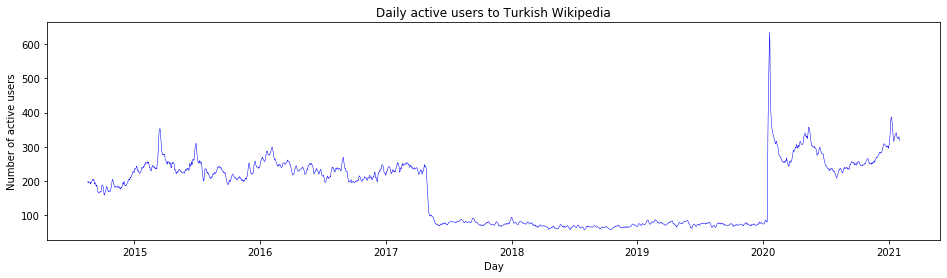

In [22]:
plt.figure(figsize=(16,4))
plt.title("Daily active users to Turkish Wikipedia")
rolling_mean = daily_active_users.rolling(window=7).mean()
plt.plot(daily_active_users.event_timestamp.values, rolling_mean, color='blue', lw=0.5)
plt.ylabel("Number of active users")
plt.xlabel("Day")
# for date in block_dates:
#     plt.axvline(date)
plt.show()

In [23]:
daily_active_users['period'] = daily_active_users.apply(lambda row: 'pre-block' if row['event_timestamp'] < block_dates[0] else 'block' if not row['event_timestamp'] >= block_dates[1] else 'after-block', axis=1)

In [24]:
daily_active_users.groupby('period').describe()

event_user_id                                                      \
                    count        mean        std    min    25%    50%     75%   
period                                                                          
after-block         383.0  283.352480  71.960530  188.0  246.5  271.0  308.00   
block               992.0   73.993952  19.797970   40.0   67.0   73.0   79.25   
pre-block           991.0  228.420787  33.085221  137.0  207.0  228.0  248.00   

                     
                max  
period               
after-block  1285.0  
block         607.0  
pre-block     395.0

In [25]:
print(f"Median activity change for all users: {100*(73.0-228.0)/(228.0)}%")

Median activity change for all users: -67.98245614035088%


Wikipedia lost nearly 70% of their daily active users due to the block.

In [26]:
from matplotlib import cm

In [27]:
n = 5 # Number of colors
new_colors = [plt.get_cmap('magma')(1. * i/n) for i in range(n)]
plt.rc('axes', prop_cycle=(plt.cycler('color', new_colors[::-1])))

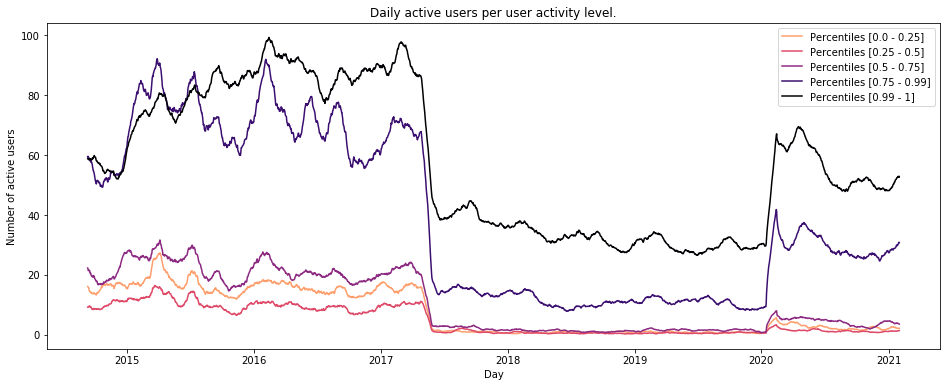

In [51]:
pctiles = ["[0.0 - 0.25]", "[0.25 - 0.5]", "[0.5 - 0.75]", "[0.75 - 0.99]", "[0.99 - 1]"]
plt.figure(figsize=(16,6))
plt.title(f"Daily active users per user activity level.")
for idx, category in enumerate(sorted(preblock_edit_counts.preblock_daily_edit_category.unique())):
    category_users = preblock_edit_counts[preblock_edit_counts['preblock_daily_edit_category'] == category].user_id
    df = edits[(edits['event_timestamp'] >= block_dates[0]-pd.Timedelta(days=blocked_days))&(edits.event_user_id.isin(category_users))].set_index('event_timestamp').groupby(pd.Grouper(freq= 'D')).event_user_id.nunique().reset_index()
    rolling_mean = df.rolling(window=30).mean()
    plt.plot(df.event_timestamp.values, rolling_mean, label = f"Percentiles {pctiles[idx]}")

plt.ylabel("Number of active users")
plt.xlabel("Day")
plt.legend()
plt.show()

In [29]:
edits_cat_slice = pd.merge(edits[['event_user_id']], preblock_edit_counts[['user_id', 'preblock_daily_edit_category']], how = 'left', left_on ='event_user_id', right_on='user_id' )

In [30]:
edits = edits.reset_index()

In [31]:
edits['preblock_daily_edit_category'] = edits_cat_slice['preblock_daily_edit_category']

In [32]:
edits = edits[~edits.preblock_daily_edit_category.isna()]

In [33]:
edits = edits[(edits['event_timestamp'] >= block_dates[0] - pd.Timedelta(days=blocked_days))]

In [34]:
edits.loc[edits['event_timestamp'] < block_dates[0], 'period'] = 'pre-block'
edits.loc[(edits['event_timestamp'] >= block_dates[0]) & (edits['event_timestamp'] < block_dates[1]), 'period'] = 'block'
edits.loc[edits['event_timestamp'] >= block_dates[1], 'period'] = 'after-block'

Wikipedia lost nearly 70% of their daily active users due to the block.

## Number of daily edits per user

In [35]:
days = edits.groupby('period').agg({'event_timestamp' : ['min', 'max']})

In [36]:
days.columns = ['min', 'max']

In [37]:
days = (days['max'] - days['min']).apply(lambda x: x.days).reset_index()

In [38]:
days.columns = ['period', 'n_days']

In [39]:
daily_edits = edits.groupby(['preblock_daily_edit_category', 'period']).size()

In [40]:
daily_edits = daily_edits.reset_index()

In [41]:
daily_edits.columns = ['preblock_daily_edit_category', 'period', 'n_edits']

In [42]:
daily_edits = pd.merge(daily_edits, days, how= 'left')

In [43]:
daily_edits['edits_per_day'] = daily_edits['n_edits']/daily_edits['n_days']

In [44]:
daily_edits = pd.merge(daily_edits, edits.groupby(['period', 'preblock_daily_edit_category'])['event_user_id'].nunique().reset_index(), how= 'left')

In [45]:
daily_edits['edits_per_user_per_day'] = daily_edits['edits_per_day']/daily_edits['event_user_id']

In [46]:
daily_edits

,preblock_daily_edit_category,period,n_edits,n_days,edits_per_day,event_user_id,edits_per_user_per_day
0,"(0.0, 0.00202]",after-block,2094,382,5.481675,377,0.014540
1,"(0.0, 0.00202]",block,1472,991,1.485368,332,0.004474
2,"(0.0, 0.00202]",pre-block,26052,990,26.315152,13026,0.002020
3,"(0.00202, 0.00303]",after-block,1162,382,3.041885,241,0.012622
4,"(0.00202, 0.00303]",block,1212,991,1.223007,203,0.006025
5,"(0.00202, 0.00303]",pre-block,20142,990,20.345455,6714,0.003030
6,"(0.00303, 0.00706]",after-block,5409,382,14.159686,518,0.027335
7,"(0.00303, 0.00706]",block,3230,991,3.259334,466,0.006994
8,"(0.00303, 0.00706]",pre-block,53219,990,53.756566,10508,0.005116
9,"(0.00706, 0.341]",after-block,101082,382,264.612565,1094,0.241876


In [47]:
pivot = pd.pivot(daily_edits, 
                               values=["edits_per_day", "edits_per_user_per_day"],
                               index="preblock_daily_edit_category",
                               columns="period")

In [48]:
pivot = pivot[[('edits_per_day', 'pre-block'),
            (         'edits_per_day',       'block'),
            (         'edits_per_day',   'after-block'),
            ('edits_per_user_per_day', 'pre-block'),
            ('edits_per_user_per_day',       'block'),
            ('edits_per_user_per_day',   'after-block')]]

In [49]:
pivot

edits_per_day                            \
period                           pre-block        block  after-block   
preblock_daily_edit_category                                           
(0.0, 0.00202]                   26.315152     1.485368     5.481675   
(0.00202, 0.00303]               20.345455     1.223007     3.041885   
(0.00303, 0.00706]               53.756566     3.259334    14.159686   
(0.00706, 0.341]                249.902020    52.482341   264.612565   
(0.341, 224.838]               1728.204040  1409.228052  2105.350785   

                             edits_per_user_per_day                        
period                                    pre-block     block after-block  
preblock_daily_edit_category                                               
(0.0, 0.00202]                             0.002020  0.004474    0.014540  
(0.00202, 0.00303]                         0.003030  0.006025    0.012622  
(0.00303, 0.00706]                         0.005116  0.006994    0.027335  
(0.00706, 0.341]                           0.028318  0.047625    0.241876  
(0.341, 224.838]                           4.386305  5.823256    8.735895

In [50]:
edits_per_day_pct = pd.concat([100*(pivot['edits_per_day']['block']-pivot['edits_per_day']['pre-block'])/pivot['edits_per_day']['pre-block'], 100*(pivot['edits_per_day']['after-block']-pivot['edits_per_day']['pre-block'])/pivot['edits_per_day']['pre-block']], axis =1)
edits_per_user_per_day = pd.concat([100*(pivot['edits_per_user_per_day']['block']-pivot['edits_per_user_per_day']['pre-block'])/pivot['edits_per_user_per_day']['pre-block'], 100*(pivot['edits_per_user_per_day']['after-block']-pivot['edits_per_user_per_day']['pre-block'])/pivot['edits_per_user_per_day']['pre-block']], axis =1)
edits_per_day_pct.columns = ['preblock -> block', 'preblock -> postblock']
edits_per_user_per_day.columns = ['preblock -> block', 'preblock -> postblock']

In [57]:
edits_per_day_pct.index = pctiles
edits_per_user_per_day.index = pctiles

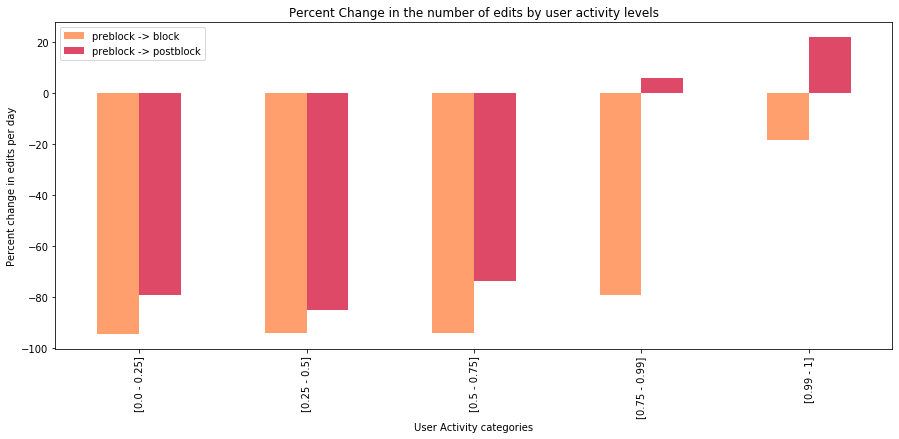

In [56]:
ax = edits_per_day_pct.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15, 6)
# Change the axes labels
ax.set_title('Percent Change in the number of edits by user activity levels')
ax.set_xlabel("User Activity categories")
ax.set_ylabel("Percent change in edits per day")
plt.show()

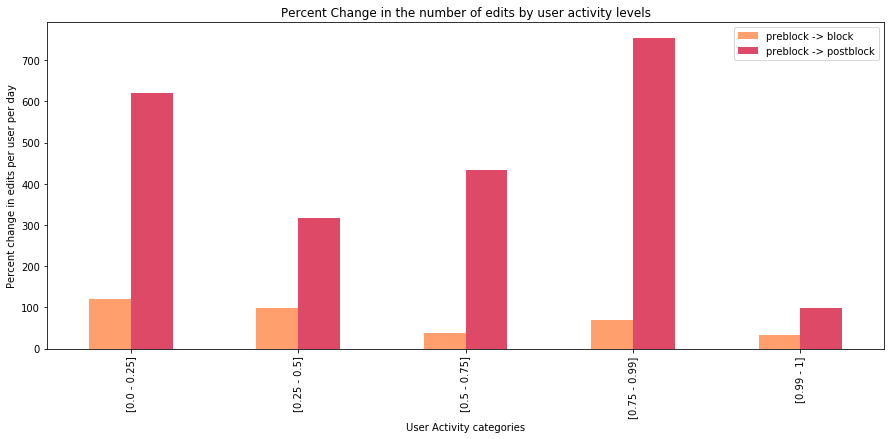

In [58]:
ax = edits_per_user_per_day.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15, 6)
# Change the axes labels
ax.set_title('Percent Change in the number of edits by user activity levels')
ax.set_xlabel("User Activity categories")
ax.set_ylabel("Percent change in edits per user per day")
plt.show()

## Non blocked users

In [59]:
non_blocked_user_edits = edits[edits['event_user_id'].isin(edits[edits['period'] == 'block'].event_user_id.unique())]

In [60]:
non_blocked_user_edits.groupby(['period']).size()

period
after-block     853076
block          1454469
pre-block      1488547
dtype: int64

In [61]:
daily_edits = non_blocked_user_edits.groupby(['preblock_daily_edit_category', 'period']).size()

In [62]:
daily_edits = daily_edits.reset_index()

In [63]:
daily_edits.columns = ['preblock_daily_edit_category', 'period', 'n_edits']

In [64]:
daily_edits = pd.merge(daily_edits, days, how= 'left')

In [65]:
daily_edits['edits_per_day'] = daily_edits['n_edits']/daily_edits['n_days']

In [66]:
daily_edits = pd.merge(daily_edits, non_blocked_user_edits.groupby(['period', 'preblock_daily_edit_category'])['event_user_id'].nunique().reset_index(), how= 'left')

In [67]:
daily_edits['edits_per_user_per_day'] = daily_edits['edits_per_day']/daily_edits['event_user_id']

In [68]:
daily_edits

,preblock_daily_edit_category,period,n_edits,n_days,edits_per_day,event_user_id,edits_per_user_per_day
0,"(0.0, 0.00202]",after-block,742,382,1.942408,92,0.021113
1,"(0.0, 0.00202]",block,1472,991,1.485368,332,0.004474
2,"(0.0, 0.00202]",pre-block,664,990,0.670707,332,0.002020
3,"(0.00202, 0.00303]",after-block,462,382,1.209424,53,0.022819
4,"(0.00202, 0.00303]",block,1212,991,1.223007,203,0.006025
5,"(0.00202, 0.00303]",pre-block,609,990,0.615152,203,0.003030
6,"(0.00303, 0.00706]",after-block,3039,382,7.955497,154,0.051659
7,"(0.00303, 0.00706]",block,3230,991,3.259334,466,0.006994
8,"(0.00303, 0.00706]",pre-block,2447,990,2.471717,466,0.005304
9,"(0.00706, 0.341]",after-block,79874,382,209.094241,508,0.411603


In [69]:
pivot = pd.pivot(daily_edits, 
                               values=["edits_per_day", "edits_per_user_per_day"],
                               index="preblock_daily_edit_category",
                               columns="period")

In [70]:
pivot = pivot[[('edits_per_day', 'pre-block'),
            (         'edits_per_day',       'block'),
            (         'edits_per_day',   'after-block'),
            ('edits_per_user_per_day', 'pre-block'),
            ('edits_per_user_per_day',       'block'),
            ('edits_per_user_per_day',   'after-block')]]

In [71]:
pivot

edits_per_day                            \
period                           pre-block        block  after-block   
preblock_daily_edit_category                                           
(0.0, 0.00202]                    0.670707     1.485368     1.942408   
(0.00202, 0.00303]                0.615152     1.223007     1.209424   
(0.00303, 0.00706]                2.471717     3.259334     7.955497   
(0.00706, 0.341]                 55.858586    52.482341   209.094241   
(0.341, 224.838]               1443.966667  1409.228052  2012.981675   

                             edits_per_user_per_day                        
period                                    pre-block     block after-block  
preblock_daily_edit_category                                               
(0.0, 0.00202]                             0.002020  0.004474    0.021113  
(0.00202, 0.00303]                         0.003030  0.006025    0.022819  
(0.00303, 0.00706]                         0.005304  0.006994    0.051659  
(0.00706, 0.341]                           0.050688  0.047625    0.411603  
(0.341, 224.838]                           5.966804  5.823256   10.322983

In [72]:
edits_per_day_pct = pd.concat([100*(pivot['edits_per_day']['block']-pivot['edits_per_day']['pre-block'])/pivot['edits_per_day']['pre-block'], 100*(pivot['edits_per_day']['after-block']-pivot['edits_per_day']['pre-block'])/pivot['edits_per_day']['pre-block']], axis =1)
edits_per_user_per_day = pd.concat([100*(pivot['edits_per_user_per_day']['block']-pivot['edits_per_user_per_day']['pre-block'])/pivot['edits_per_user_per_day']['pre-block'], 100*(pivot['edits_per_user_per_day']['after-block']-pivot['edits_per_user_per_day']['pre-block'])/pivot['edits_per_user_per_day']['pre-block']], axis =1)
edits_per_day_pct.columns = ['preblock -> block', 'preblock -> postblock']
edits_per_user_per_day.columns = ['preblock -> block', 'preblock -> postblock']

In [76]:
edits_per_user_per_day.index = pctiles
edits_per_day_pct.index = pctiles

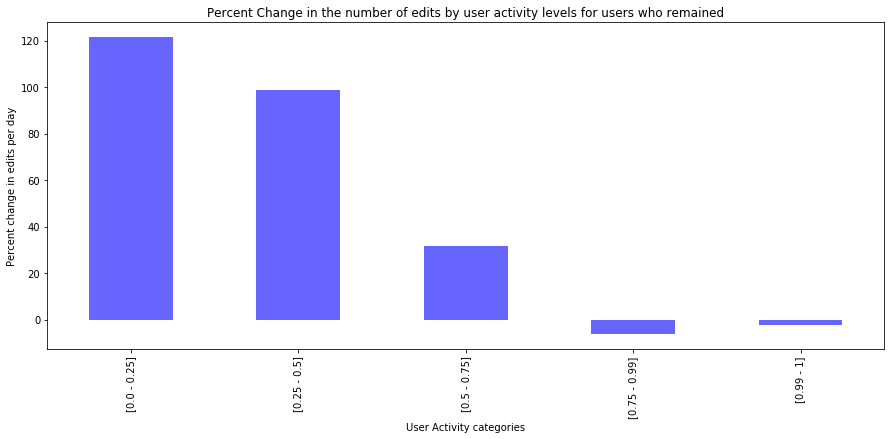

In [77]:
ax = edits_per_day_pct['preblock -> block'].plot(kind="bar", color = 'blue', alpha = 0.6 )
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15, 6)
# Change the axes labels
ax.set_title('Percent Change in the number of edits by user activity levels for users who remained')
ax.set_xlabel("User Activity categories")
ax.set_ylabel("Percent change in edits per day")
plt.show()

## Bootstrapped user activity plots

In [271]:
daily_active_users = edits.set_index('event_timestamp').groupby([pd.Grouper(freq= 'D'), 'preblock_daily_edit_category']).event_user_id.nunique()

In [273]:
daily_active_users = daily_active_users.reset_index()

In [275]:
daily_active_users['period'] = daily_active_users.apply(lambda row: 'pre-block' if row['event_timestamp'] < block_dates[0] else 'block' if not row['event_timestamp'] >= block_dates[1] else 'after-block', axis=1)

In [287]:
daily_active_users[daily_active_users['period'] == 'block']

,event_timestamp,preblock_daily_edit_category,event_user_id,period
4955,2017-04-29 00:00:00+00:00,"(0.0, 0.00202]",2,block
4956,2017-04-29 00:00:00+00:00,"(0.00202, 0.00303]",6,block
4957,2017-04-29 00:00:00+00:00,"(0.00303, 0.00706]",6,block
4958,2017-04-29 00:00:00+00:00,"(0.00706, 0.341]",33,block
4959,2017-04-29 00:00:00+00:00,"(0.341, 224.838]",54,block
...,...,...,...,...
9910,2020-01-15 00:00:00+00:00,"(0.0, 0.00202]",11,block
9911,2020-01-15 00:00:00+00:00,"(0.00202, 0.00303]",5,block
9912,2020-01-15 00:00:00+00:00,"(0.00303, 0.00706]",8,block
9913,2020-01-15 00:00:00+00:00,"(0.00706, 0.341]",51,block


In [290]:
daily_active_users = daily_active_users.pivot(index='event_timestamp', columns='preblock_daily_edit_category', values='event_user_id')

In [328]:
preblock = daily_active_users.loc[:block_dates[0] - pd.Timedelta(days=1)].to_numpy()

In [329]:
block = daily_active_users.loc[block_dates[0]:block_dates[1]- pd.Timedelta(days=1)].to_numpy()

In [339]:
afterblock = daily_active_users.loc[block_dates[1]:].to_numpy()

In [399]:
from sklearn.utils import resample
import matplotlib.ticker as mtick

In [381]:
def calculate_bootstrapped_pct_change(n_bootstrap = 1000, n_samples = 100):
    
    preblock_block_change = np.zeros((n_bootstrap, 5))
    block_afterblock_change = np.zeros((n_bootstrap, 5))
    preblock_afterblock_change = np.zeros((n_bootstrap, 5))

    for i in range(n_bootstrap):
    
        preblock_bootstrap = resample(preblock, n_samples = n_samples, replace=True)
        block_bootstrap = resample(block, n_samples = n_samples, replace=True)
        afterblock_bootstrap = resample(afterblock, n_samples = n_samples, replace=True)
        preblock_mean = preblock_bootstrap.mean(axis = 0)
        block_mean = block_bootstrap.mean(axis = 0)
        afterblock_mean = afterblock_bootstrap.mean(axis = 0)

        preblock_block_change[i, :] = 100*(block_mean-preblock_mean)/preblock_mean
        block_afterblock_change[i, :]= 100*(afterblock_mean-block_mean)/block_mean
        preblock_afterblock_change[i, :]= 100*(afterblock_mean-preblock_mean)/preblock_mean
        
    return preblock_block_change, block_afterblock_change, preblock_afterblock_change
    
    

In [382]:
preblock_block_change, block_afterblock_change, preblock_afterblock_change = calculate_bootstrapped_pct_change()

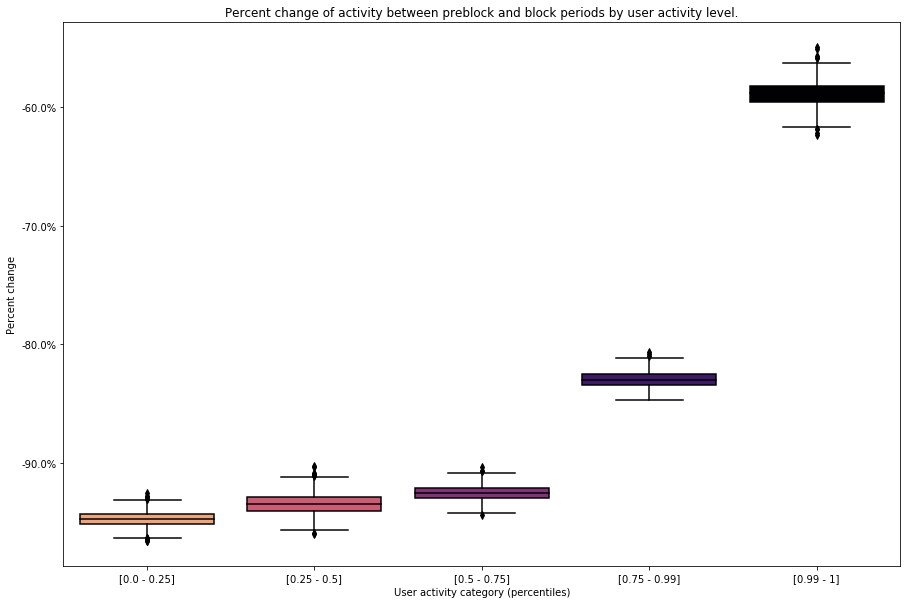

In [404]:
fig, ax = plt.subplots()
plt.title(f"Percent change of activity between preblock and block periods by user activity level.")
fig.set_size_inches(15, 10)
plt.xlabel('User activity category (percentiles)')
plt.ylabel('Percent change')

ax = sns.boxplot(data=preblock_block_change)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(list(range(5)), pctiles)

plt.show()

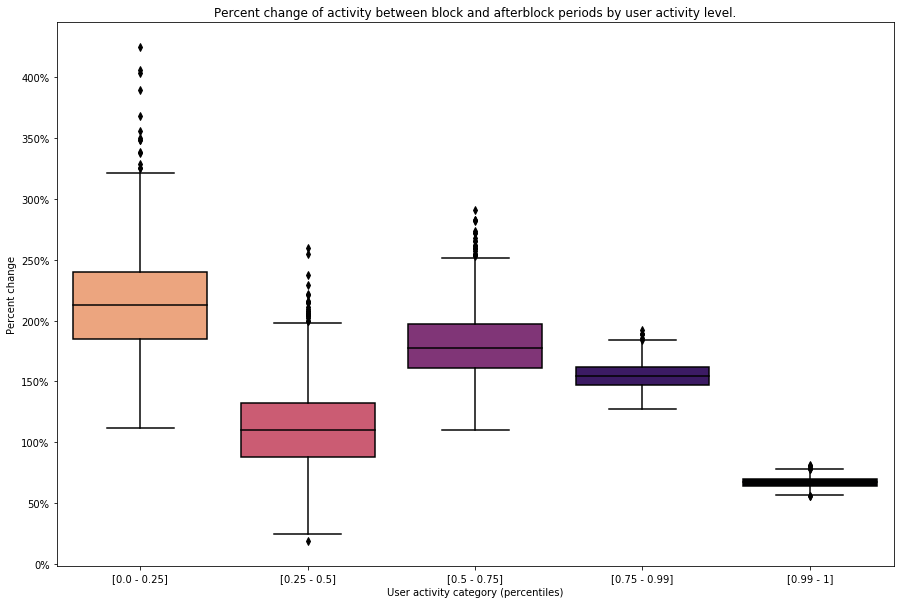

In [405]:
fig, ax = plt.subplots()
plt.title(f"Percent change of activity between block and afterblock periods by user activity level.")
fig.set_size_inches(15, 10)
plt.xlabel('User activity category (percentiles)')
plt.ylabel('Percent change')

ax = sns.boxplot(data=block_afterblock_change)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(list(range(5)), pctiles)

plt.show()

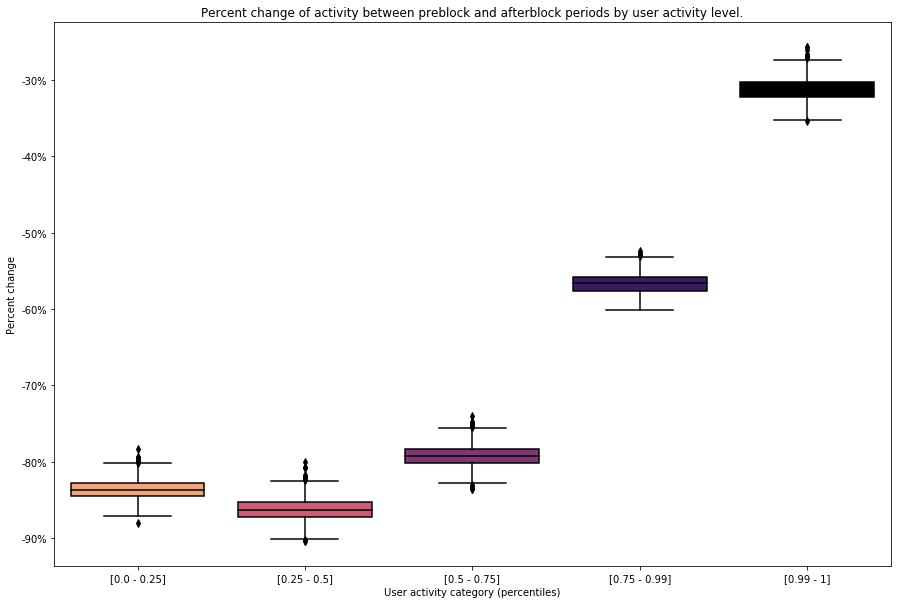

In [406]:
fig, ax = plt.subplots()
plt.title(f"Percent change of activity between preblock and afterblock periods by user activity level.")
fig.set_size_inches(15, 10)
plt.xlabel('User activity category (percentiles)')
plt.ylabel('Percent change')

ax = sns.boxplot(data=preblock_afterblock_change)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(list(range(5)), pctiles)

plt.show()